# Домашняя работа 

В этой работы мы будем учиться предсказывать зарплату data scientist-ов в зависимочти от ряда факторов с помощью градиентоного бустинга

Цель домашней работы научиться предсказывать зарплаты (salary_in_usd) по ряды факторов 

work_year: The number of years of work experience in the field of data science.

experience_level: The level of experience, such as Junior, Senior, or Lead.

employment_type: The type of employment, such as Full-time or Contract.

job_title: The specific job title or role, such as Data Analyst or Data Scientist.

salary: The salary amount for the given job.

salary_currency: The currency in which the salary is denoted.

salary_in_usd: The equivalent salary amount converted to US dollars (USD) for comparison purposes.

employee_residence: The country or region where the employee resides.

remote_ratio: The percentage of remote work offered in the job.

company_location: The location of the company or organization.

company_size: The company’s size is categorized as Small, Medium, or Large.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('ds_salaries.csv')

In [9]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [10]:
df.sort_values('salary_in_usd')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2684,2022,MI,FT,NLP Engineer,120000,CZK,5132,CZ,100,CZ,M
2578,2021,EN,FT,Power BI Developer,400000,INR,5409,IN,50,IN,L
3537,2021,MI,PT,3D Computer Vision Researcher,400000,INR,5409,IN,50,IN,M
3667,2021,MI,FT,Data Scientist,420000,INR,5679,IN,100,US,S
3685,2020,EN,FT,Data Science Consultant,423000,INR,5707,IN,50,IN,M
...,...,...,...,...,...,...,...,...,...,...,...
3675,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
528,2023,SE,FT,AI Scientist,1500000,ILS,423834,IL,0,IL,L
2011,2022,MI,FT,Data Analyst,350000,GBP,430967,GB,0,GB,M


## Задание 1 (0.5 балла)

Разделите выборку на train, val, test (80%, 10%, 10%) в качестве таргета выберите salary_in_usd, удалите из признаков (salary) чтобы избежать лика в данных.

In [11]:
#work_year - принимает значения от 2020 до 2023 (т.к. зп была за определенный год, то не означает, что чем больше год - тем больше зп) 
new_df = pd.get_dummies(df, columns = ['work_year'], drop_first=True)
#experience_level - принимает значения EX, SE, MI, EN - best -> worst
new_df['experience_level'] = new_df['experience_level'].replace(["EX", "SE", "MI", "EN"], list(reversed(range(4))))

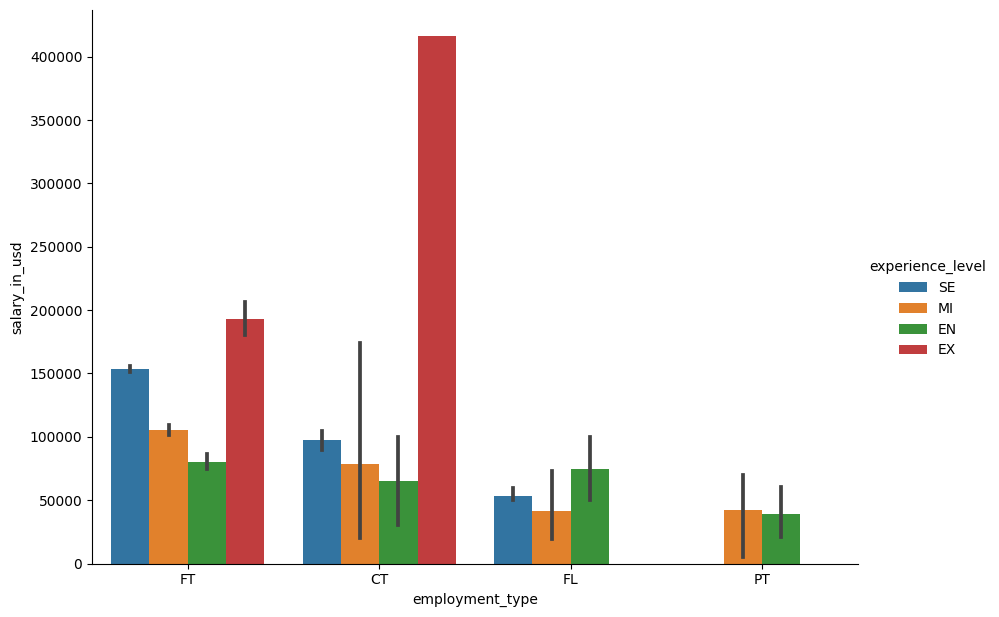

<AxesSubplot: xlabel='employment_type', ylabel='salary_in_usd'>

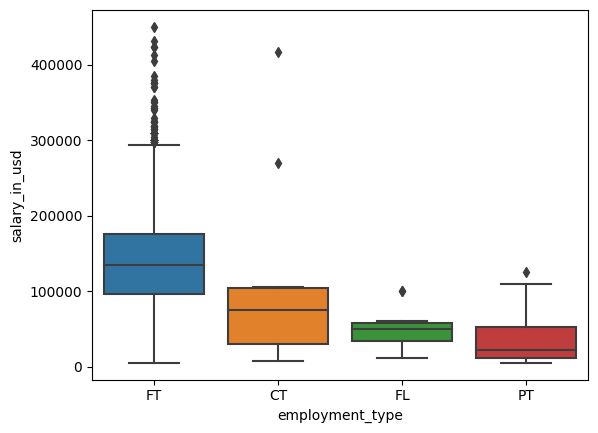

In [12]:
import seaborn as sns
sns.catplot(data = df, x = 'employment_type', y = 'salary_in_usd', hue = 'experience_level', kind = 'bar',height=6.27, aspect=11.7/8.27)
plt.show()
#sns.set(rc={'figure.figsize':(10.27,6)})
sns.boxplot(data = df, x = 'employment_type', y = 'salary_in_usd')

По графику видим, что у не руководителей зп распределяется по убыванию (senior -> junior), также видно, что на full-time получают в разы больше, чем на part-time, по контракту также получают меньше. Следовательно, можно сделать признак порядковым, таким что зп распределяется в соответствии: FT -> CT -> FL -> PT. По boxplot можно сделать такой же вывод, посмотрев распределение зп.

In [13]:
new_df['employment_type'] = new_df['employment_type'].replace(["FT", "CT", "FL", "PT"], list(reversed(range(4))))

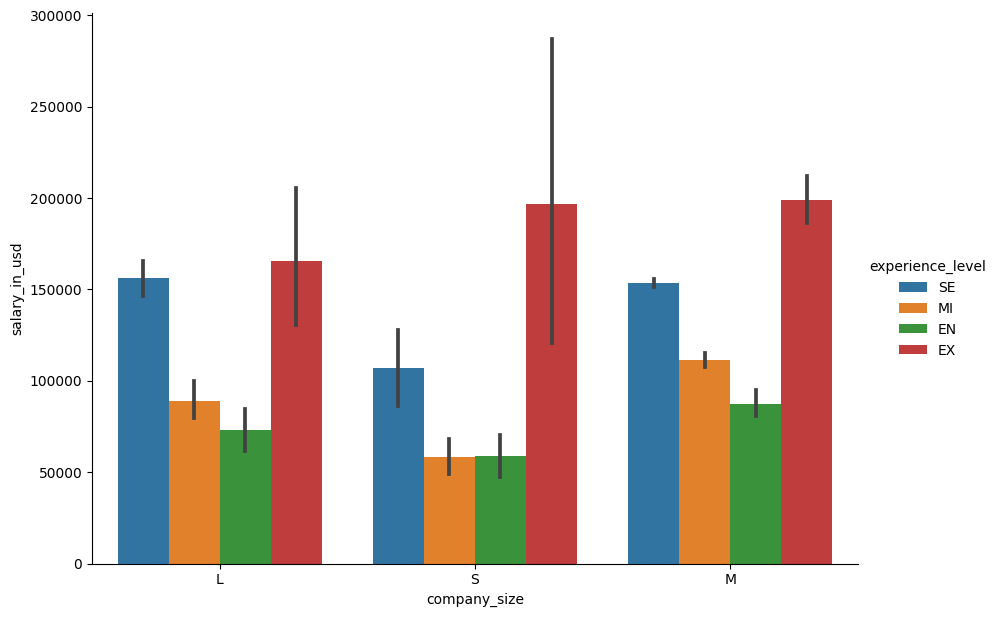

<AxesSubplot: xlabel='company_size', ylabel='salary_in_usd'>

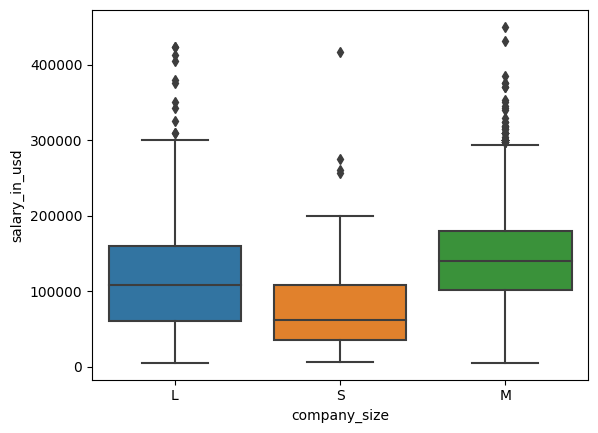

In [14]:
sns.catplot(data = df, x = 'company_size', y = 'salary_in_usd', hue = 'experience_level', kind = 'bar',height=6.27, aspect=11.7/8.27)
plt.show()
#sns.set(rc={'figure.figsize':(10.27,6)})
sns.boxplot(data = df, x = 'company_size', y = 'salary_in_usd')

Видно, что в средних по размеру компаниях зп выше, чем в маленьких\больших. Распределение зп по уровням остается таким же для любого размера, хотя в маленьких компаниях джунам платят на уровне мидов. А в больших зп глав чуть выше синьоров. Можно увидеть, что в маленьких компаниях все зп лутает босс :) Думаю, что признак можно сделать порядковым, распределив, относительно зп, M - L - S (best -> worst). 

In [15]:
new_df['company_size'] = new_df['company_size'].replace(["M", "L", "S"], list(reversed(range(3))))

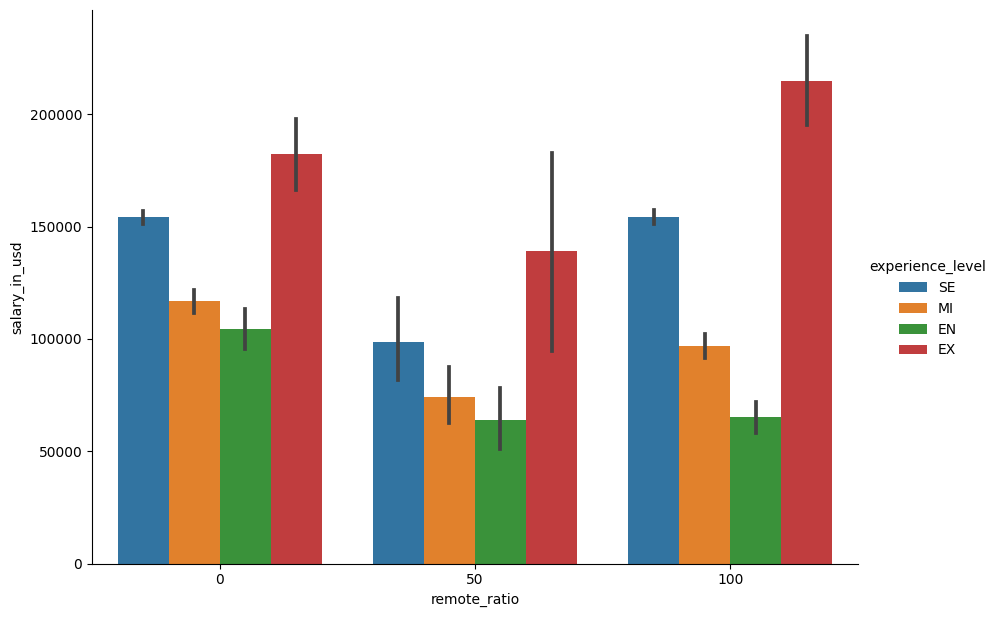

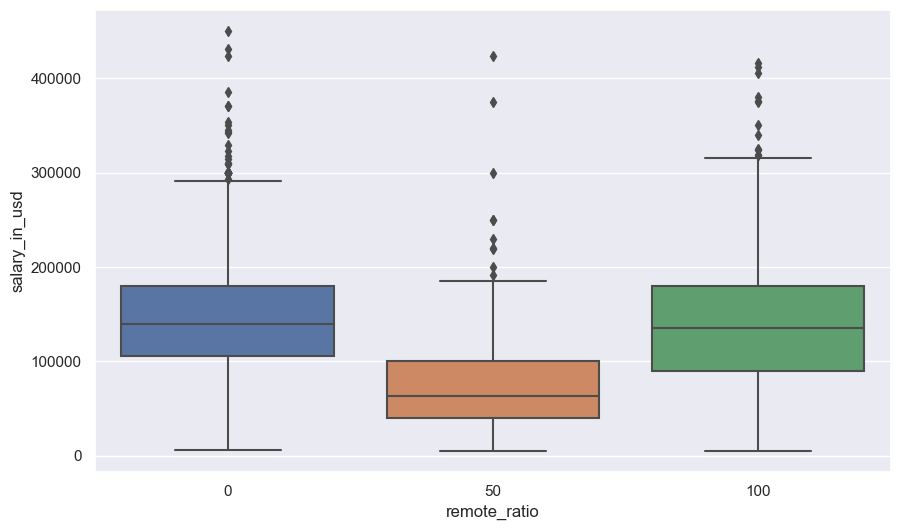

<AxesSubplot: xlabel='work_year', ylabel='count'>

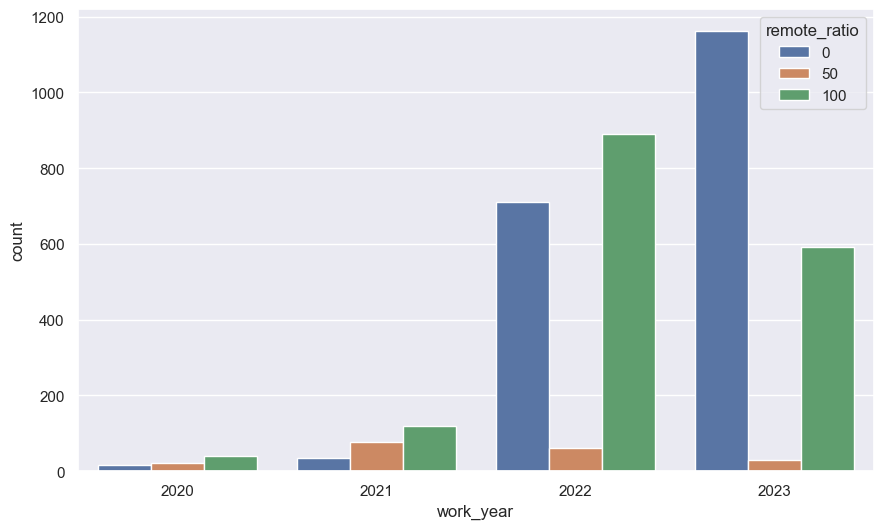

In [16]:
sns.catplot(data = df, x = 'remote_ratio', y = 'salary_in_usd', hue = 'experience_level', kind = 'bar',height=6.27, aspect=11.7/8.27)
plt.show()
sns.set(rc={'figure.figsize':(10.27,6)})
sns.boxplot(data = df, x = 'remote_ratio', y = 'salary_in_usd')
plt.show()
sns.countplot(data = df, x = 'work_year',hue = 'remote_ratio')


По графику видно, что специалисты, которые засели в офисе или дома получают в 1.7 - 2 раза больше чем те, которые работают удаленно 50\50. Зп синьоров для нашедших место примерно одинакова, но джуны и миды, которые ездят в офис, получают стабильно больше остальных. Получется, что признак порядковый.
Также можно заметить по 2ому графику, что в целом прогеры, которые ездят в офис, получают немного больше в среднем, чем работающие на удаленке. Значит распределение будет 0 -> 100 -> 50\50 (best -> worst).

Кстати, если выводить график удаленки от года, можно заметить, что в 20\21 году преимущественно была удаленка\ хождение 50\50. В 22 ковид все еще держал верх и на удаленке было больше людей, однако в 23 году его победили и людей, работающих из офиса, стало больше, чем людей на удаленке.

In [17]:
new_df['remote_ratio'] = new_df['remote_ratio'].replace([0, 100, 50], list(reversed(range(3))))

In [18]:
new_df

,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,work_year_2021,work_year_2022,work_year_2023
0,2,3,Principal Data Scientist,80000,EUR,85847,ES,1,ES,1,0,0,1
1,1,2,ML Engineer,30000,USD,30000,US,1,US,0,0,0,1
2,1,2,ML Engineer,25500,USD,25500,US,1,US,0,0,0,1
3,2,3,Data Scientist,175000,USD,175000,CA,1,CA,2,0,0,1
4,2,3,Data Scientist,120000,USD,120000,CA,1,CA,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2,3,Data Scientist,412000,USD,412000,US,1,US,1,0,0,0
3751,1,3,Principal Data Scientist,151000,USD,151000,US,1,US,1,1,0,0
3752,0,3,Data Scientist,105000,USD,105000,US,1,US,0,0,0,0
3753,0,2,Business Data Analyst,100000,USD,100000,US,1,US,1,0,0,0


In [19]:
df['job_title'].value_counts(ascending=False)

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

<AxesSubplot: xlabel='count', ylabel='job_title'>

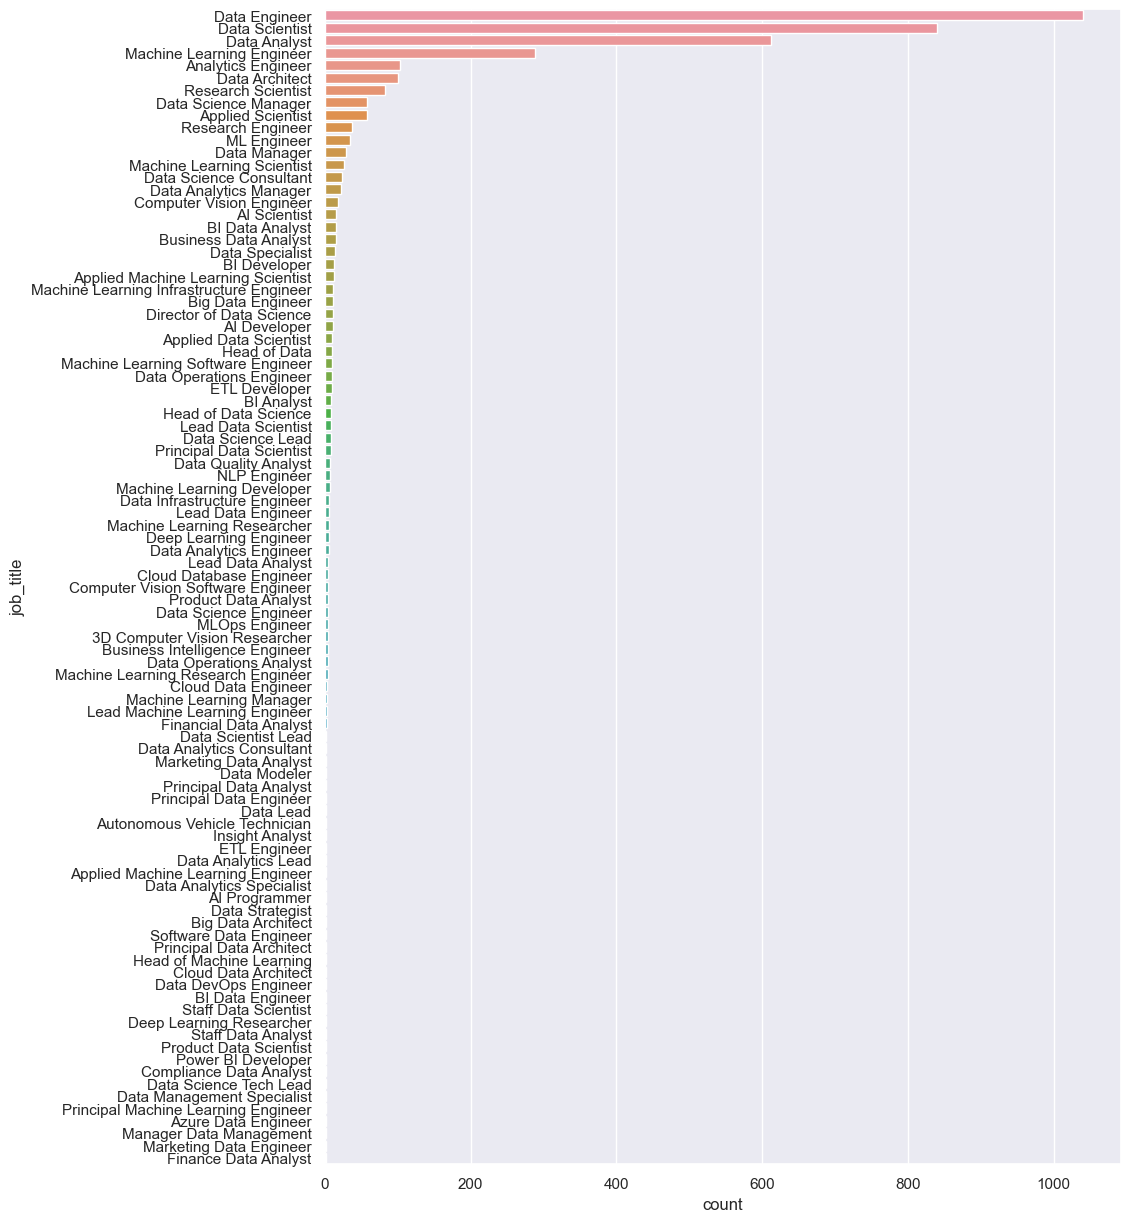

In [20]:
sns.set(rc={'figure.figsize':(10.27,15)})
sns.countplot(data = df,y = 'job_title',order = df['job_title'].value_counts().index)

In [21]:
sum(df['job_title'].value_counts()[:15]),sum(df['job_title'].value_counts()[:]) 
# сколько человек в первой десятке имеют работу имеет смысл делать one-hot для первых 15 (составляет примерно 90% от общего)

(3355, 3755)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Data Engineer'),
  Text(1, 0, 'Data Scientist'),
  Text(2, 0, 'Data Analyst'),
  Text(3, 0, 'Machine Learning Engineer'),
  Text(4, 0, 'Analytics Engineer'),
  Text(5, 0, 'Data Architect'),
  Text(6, 0, 'Research Scientist'),
  Text(7, 0, 'Data Science Manager'),
  Text(8, 0, 'Applied Scientist'),
  Text(9, 0, 'Research Engineer'),
  Text(10, 0, 'ML Engineer'),
  Text(11, 0, 'Data Manager'),
  Text(12, 0, 'Machine Learning Scientist'),
  Text(13, 0, 'Data Science Consultant'),
  Text(14, 0, 'Data Analytics Manager')])

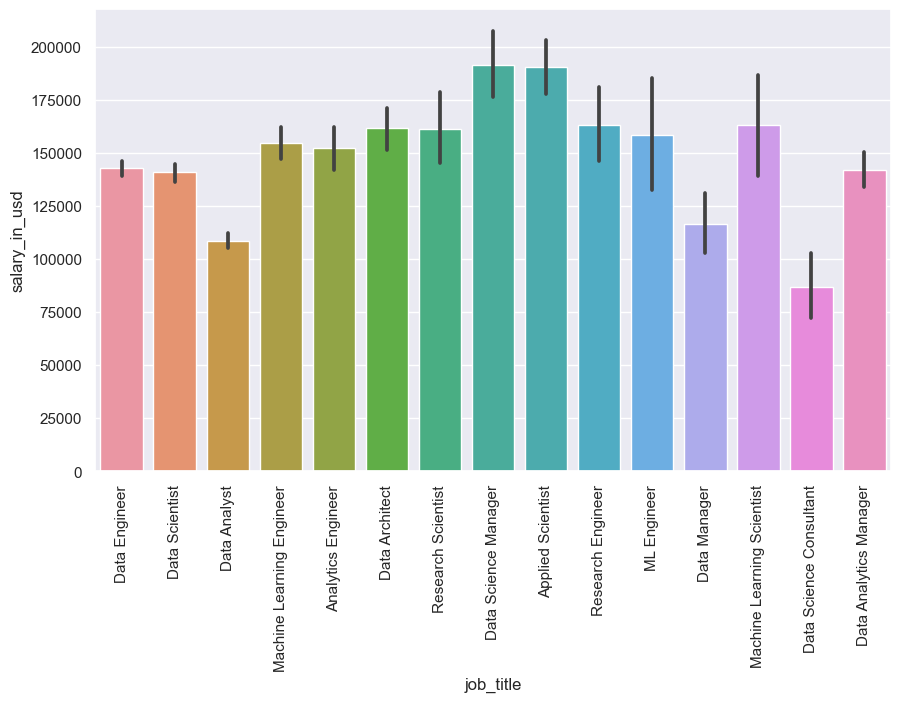

In [22]:
sns.set(rc={'figure.figsize':(10.27,6)})
sns.barplot(data = df[df['job_title'].isin(df['job_title'].value_counts()[:15].index.tolist())], 
x = 'job_title', y = 'salary_in_usd',order = df['job_title'].value_counts()[:15].index)
plt.xticks(rotation=90)

По графику заметно, что есть четкая градация для некоторых профессий. Так аналитики получают меньше, чем разработчики. Разработчики в то время получают меньше людей, которые углублены в науку. То есть, если мы разделим данные one-hot и оставим этот признак категориальным, то сможем увидеть смысл и уменьшение ошибки на целевой функции, т.к. видна градация. Дальше 90% не вижу смысла разбивать признаки, т.к. под маленькие категории уже пойдет переобучение и подстроение из-за малого кол-ва объектов обучения -> на новом объекте возможна большая ошибка.

In [23]:
allowed = df['job_title'].value_counts()[:15].index.tolist()
new_df.loc[~new_df["job_title"].isin(allowed), "job_title"] = "None"
new_df =  pd.get_dummies(new_df, columns = ['job_title'], drop_first=False).drop('job_title_None',axis = 1)
new_df

,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,work_year_2021,...,job_title_Data Engineer,job_title_Data Manager,job_title_Data Science Consultant,job_title_Data Science Manager,job_title_Data Scientist,job_title_ML Engineer,job_title_Machine Learning Engineer,job_title_Machine Learning Scientist,job_title_Research Engineer,job_title_Research Scientist
0,2,3,80000,EUR,85847,ES,1,ES,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,30000,USD,30000,US,1,US,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,2,25500,USD,25500,US,1,US,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2,3,175000,USD,175000,CA,1,CA,2,0,...,0,0,0,0,1,0,0,0,0,0
4,2,3,120000,USD,120000,CA,1,CA,2,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2,3,412000,USD,412000,US,1,US,1,0,...,0,0,0,0,1,0,0,0,0,0
3751,1,3,151000,USD,151000,US,1,US,1,1,...,0,0,0,0,0,0,0,0,0,0
3752,0,3,105000,USD,105000,US,1,US,0,0,...,0,0,0,0,1,0,0,0,0,0
3753,0,2,100000,USD,100000,US,1,US,1,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot: xlabel='count', ylabel='salary_currency'>

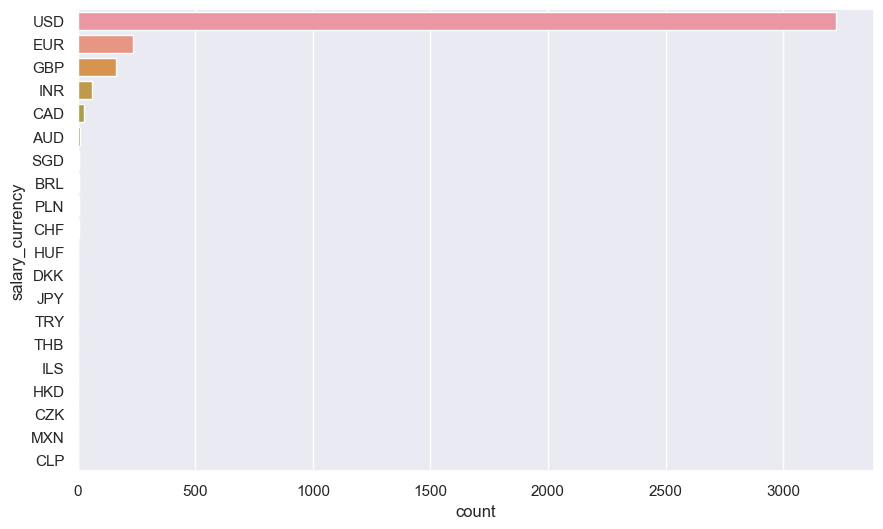

In [24]:
sns.countplot(data = df,y = 'salary_currency',order = df['salary_currency'].value_counts().index)

Вижу смысл делать акцент на первых 5 валютах, дальше будет в целом сложно обучиться для этого признака, т.к. выборка маленькая будет

In [25]:
sum(df['salary_currency'].value_counts()[:5]),sum(df['salary_currency'].value_counts()[:]) #ну т.е. 98% примерно - первые 5 валют.

(3706, 3755)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'USD'),
  Text(1, 0, 'EUR'),
  Text(2, 0, 'GBP'),
  Text(3, 0, 'INR'),
  Text(4, 0, 'CAD')])

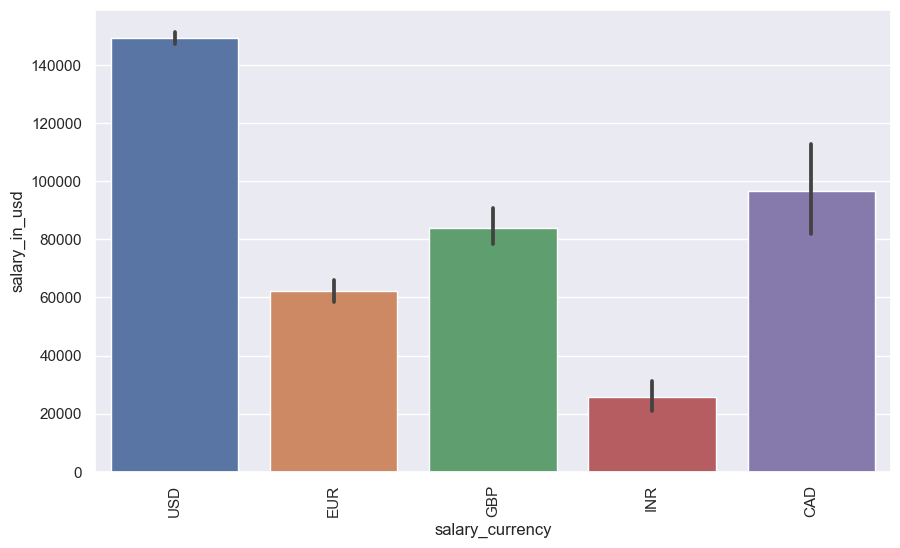

In [26]:
sns.set(rc={'figure.figsize':(10.27,6)})
sns.barplot(data = df[df['salary_currency'].isin(df['salary_currency'].value_counts()[:5].index.tolist())], 
x = 'salary_currency', y = 'salary_in_usd',order = df['salary_currency'].value_counts()[:5].index)
plt.xticks(rotation=90)

Заметно, что людям, которым платят в долларах в среднем зп больше в 1.5 - 2 раза от остальных. В Индии труд совсем не ценят судя по всему... У людей, получающих зп в национальных валютах Британии и Канады, есть преимущество перед ЕС, но большое отставание от спецов, получающих доллары. Так что разбить one-hot на 5 валют выглядит довольно здравой идеей, прослеживаются факторы для обучения.

In [27]:
allowed = df['salary_currency'].value_counts()[:5].index.tolist()
new_df.loc[~new_df["salary_currency"].isin(allowed), "salary_currency"] = "None"
new_df =  pd.get_dummies(new_df, columns = ['salary_currency'], drop_first=False).drop('salary_currency_None',axis = 1) #подумать надо, дропать нет... Вроде как корреляции не должно быть, т.к. дропаем нан
new_df

,experience_level,employment_type,salary,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,work_year_2021,work_year_2022,...,job_title_ML Engineer,job_title_Machine Learning Engineer,job_title_Machine Learning Scientist,job_title_Research Engineer,job_title_Research Scientist,salary_currency_CAD,salary_currency_EUR,salary_currency_GBP,salary_currency_INR,salary_currency_USD
0,2,3,80000,85847,ES,1,ES,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,2,30000,30000,US,1,US,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,2,25500,25500,US,1,US,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,2,3,175000,175000,CA,1,CA,2,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,3,120000,120000,CA,1,CA,2,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2,3,412000,412000,US,1,US,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3751,1,3,151000,151000,US,1,US,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3752,0,3,105000,105000,US,1,US,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3753,0,2,100000,100000,US,1,US,1,0,0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot: xlabel='count', ylabel='employee_residence'>

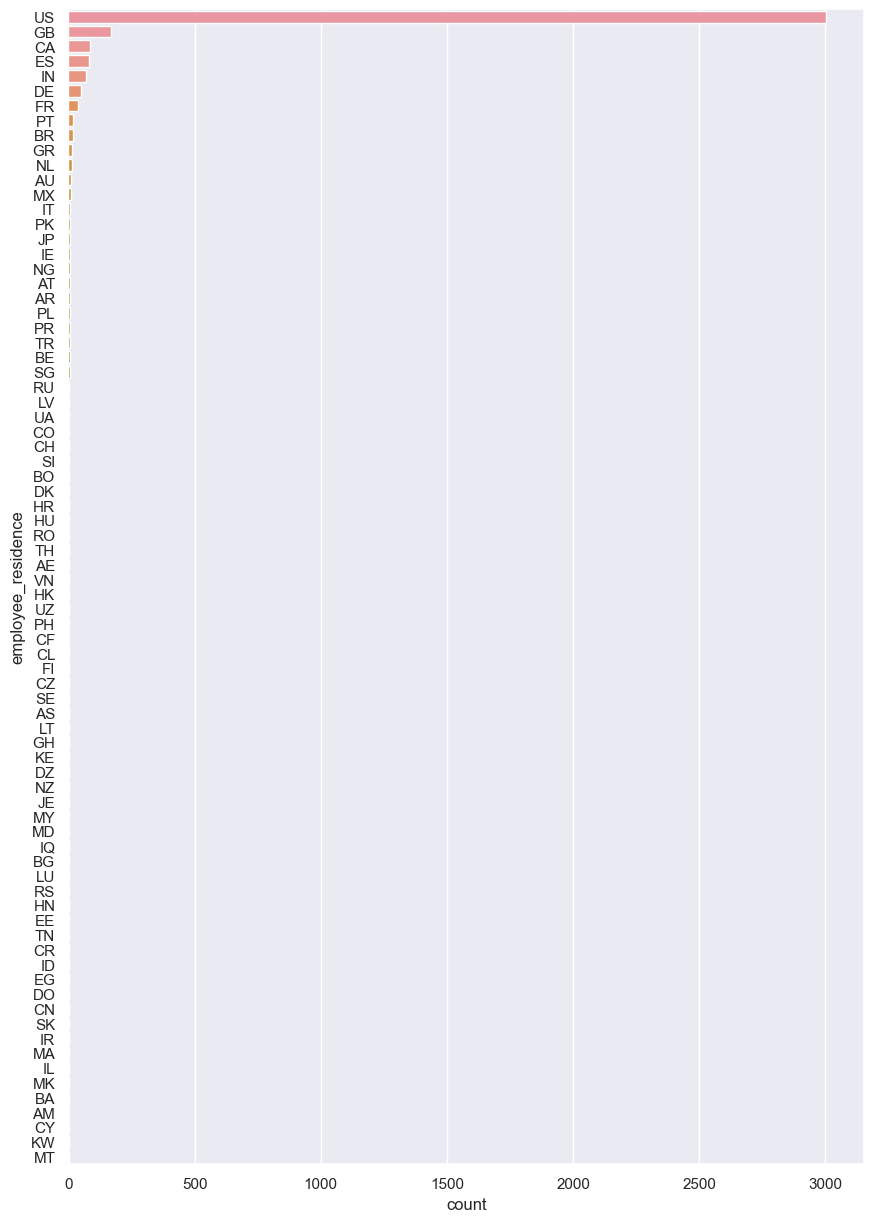

In [28]:
sns.set(rc={'figure.figsize':(10.27,15)})
sns.countplot(data = df,y = 'employee_residence',order = df['employee_residence'].value_counts().index)

In [29]:
sum(df['employee_residence'].value_counts()[:7]),sum(df['employee_residence'].value_counts()[:]) # 93% примерно - первые 7 стран.

(3493, 3755)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'US'),
  Text(1, 0, 'GB'),
  Text(2, 0, 'CA'),
  Text(3, 0, 'ES'),
  Text(4, 0, 'IN'),
  Text(5, 0, 'DE'),
  Text(6, 0, 'FR')])

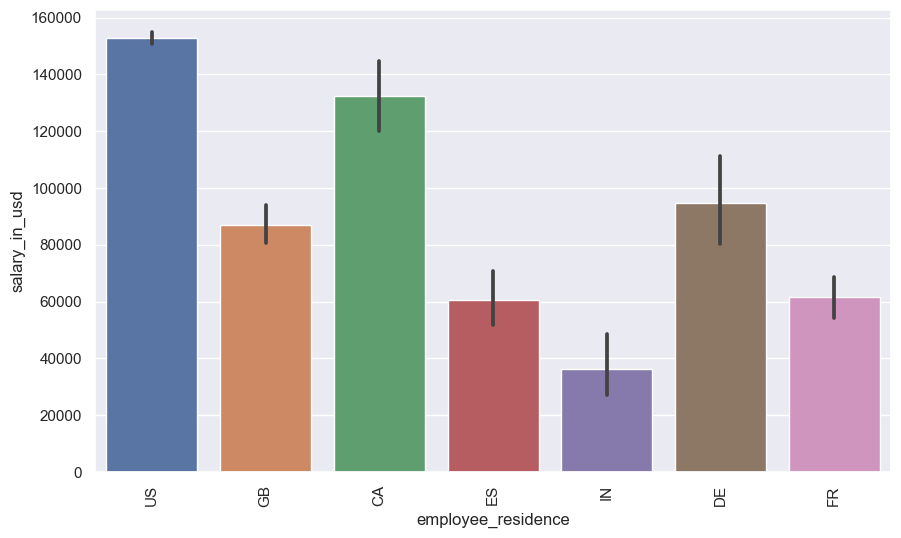

In [30]:
sns.set(rc={'figure.figsize':(10.27,6)})
sns.barplot(data = df[df['employee_residence'].isin(df['employee_residence'].value_counts()[:7].index.tolist())], 
x = 'employee_residence', y = 'salary_in_usd',order = df['employee_residence'].value_counts()[:7].index)
plt.xticks(rotation=90)

Можно сказать, что больше всего получают американцы, что не является странным, т.к. больше всех зп у людей, с которыми рассчитываются в долларах. Канадцы также получают довольно неплохо, меньше, конечно, чем американцы. А вот ЕС и Британия отстают в плане зарплат, за стандарт которых мы берем американский рынок. Специалисты Индии получают очень мало, почти в 4 раза меньше американцев, можно понять что нац. валюта не спасает положение. Исходя из прошлых графиков видно, что выравнивают положение зарплат людей, проживающих в Индии, только зп в других валютах. Т.е. если национальной валютой в среднем платят на 25к долларов, то на этом графике среднюю зп мы видим в 38к. Получаем, что это довольно неплохой признак, по которому можно понять, у кого будет зп больше. Думаю тоже one-hot.

In [31]:
allowed = df['employee_residence'].value_counts()[:7].index.tolist()
new_df.loc[~new_df["employee_residence"].isin(allowed), "employee_residence"] = "None"
new_df =  pd.get_dummies(new_df, columns = ['employee_residence'], drop_first=False).drop('employee_residence_None',axis = 1)
new_df

,experience_level,employment_type,salary,salary_in_usd,remote_ratio,company_location,company_size,work_year_2021,work_year_2022,work_year_2023,...,salary_currency_GBP,salary_currency_INR,salary_currency_USD,employee_residence_CA,employee_residence_DE,employee_residence_ES,employee_residence_FR,employee_residence_GB,employee_residence_IN,employee_residence_US
0,2,3,80000,85847,1,ES,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,1,2,30000,30000,1,US,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,1,2,25500,25500,1,US,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,2,3,175000,175000,1,CA,2,0,0,1,...,0,0,1,1,0,0,0,0,0,0
4,2,3,120000,120000,1,CA,2,0,0,1,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2,3,412000,412000,1,US,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3751,1,3,151000,151000,1,US,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3752,0,3,105000,105000,1,US,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3753,0,2,100000,100000,1,US,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


<AxesSubplot: xlabel='count', ylabel='company_location'>

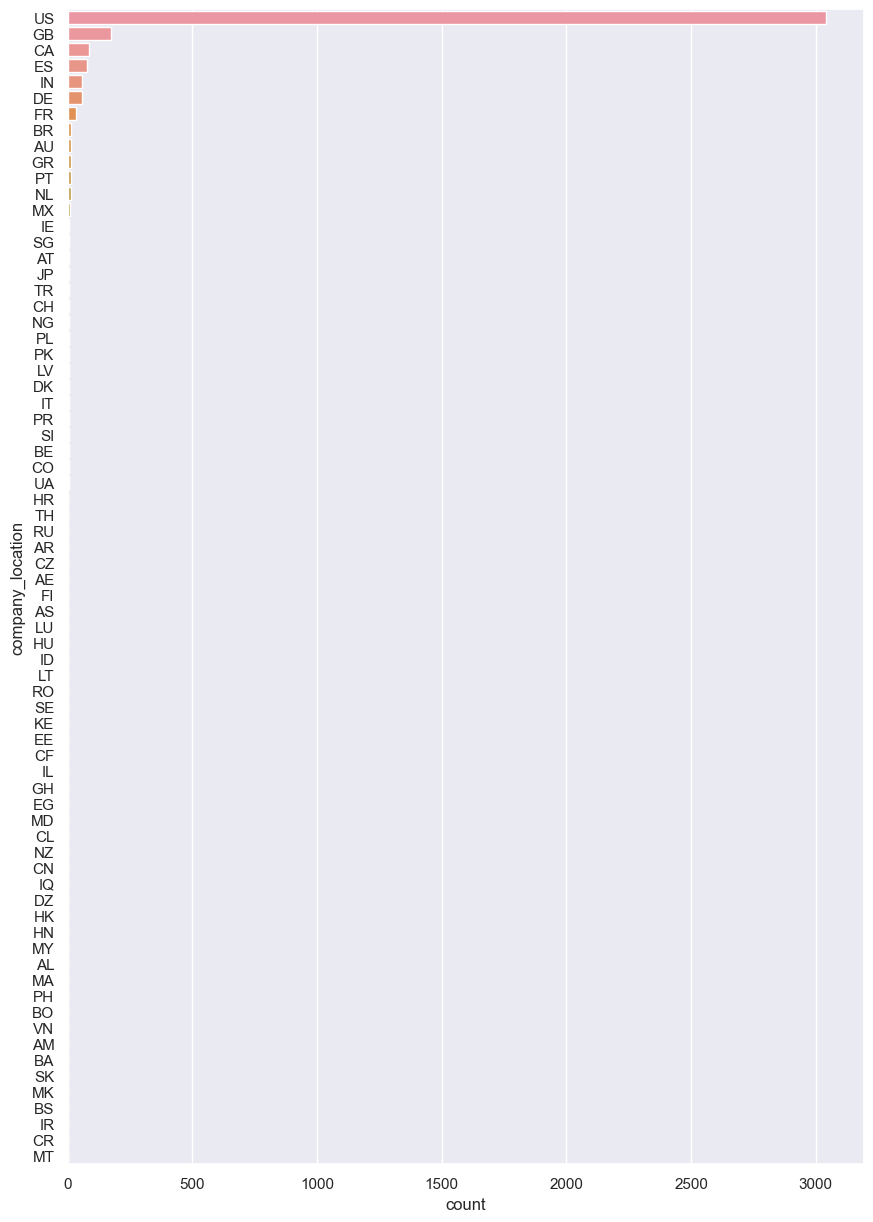

In [32]:
sns.set(rc={'figure.figsize':(10.27,15)})
sns.countplot(data = df,y = 'company_location',order = df['company_location'].value_counts().index)

In [33]:
sum(df['company_location'].value_counts()[:7]),sum(df['company_location'].value_counts()[:]) # 94% примерно - первые 7 стран.

(3524, 3755)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'US'),
  Text(1, 0, 'GB'),
  Text(2, 0, 'CA'),
  Text(3, 0, 'ES'),
  Text(4, 0, 'IN'),
  Text(5, 0, 'DE'),
  Text(6, 0, 'FR')])

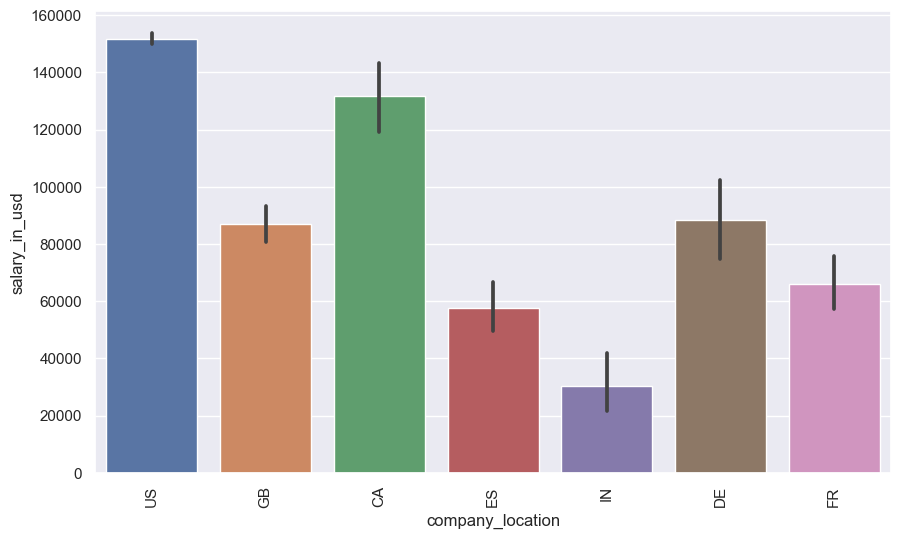

In [34]:
sns.set(rc={'figure.figsize':(10.27,6)})
sns.barplot(data = df[df['company_location'].isin(df['company_location'].value_counts()[:7].index.tolist())], 
x = 'company_location', y = 'salary_in_usd',order = df['company_location'].value_counts()[:7].index)
plt.xticks(rotation=90)

Признак меняется, графики в принципе нет. Опять же компания ориентируется на жителей страны, следовательно ставит зп в соответствии с рынком. Тем самым, опять сначала больше всего платят компании со штабом в Америке, потом в ЕС, после в Индии. Т.е. признаки рассчетной валюты, места проживания и компаний в регионе связаны в целом. 

In [35]:
allowed = df['company_location'].value_counts()[:7].index.tolist()
new_df.loc[~new_df["company_location"].isin(allowed), "company_location"] = "None"
new_df =  pd.get_dummies(new_df, columns = ['company_location'], drop_first=False).drop('company_location_None',axis = 1)
new_df

,experience_level,employment_type,salary,salary_in_usd,remote_ratio,company_size,work_year_2021,work_year_2022,work_year_2023,job_title_Analytics Engineer,...,employee_residence_GB,employee_residence_IN,employee_residence_US,company_location_CA,company_location_DE,company_location_ES,company_location_FR,company_location_GB,company_location_IN,company_location_US
0,2,3,80000,85847,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,2,30000,30000,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,1,2,25500,25500,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,2,3,175000,175000,1,2,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2,3,120000,120000,1,2,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2,3,412000,412000,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3751,1,3,151000,151000,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3752,0,3,105000,105000,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3753,0,2,100000,100000,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [36]:
new_df = new_df.drop('salary',axis = 1) # от корреляции с целевой переменной
new_df

,experience_level,employment_type,salary_in_usd,remote_ratio,company_size,work_year_2021,work_year_2022,work_year_2023,job_title_Analytics Engineer,job_title_Applied Scientist,...,employee_residence_GB,employee_residence_IN,employee_residence_US,company_location_CA,company_location_DE,company_location_ES,company_location_FR,company_location_GB,company_location_IN,company_location_US
0,2,3,85847,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,2,30000,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,2,25500,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2,3,175000,1,2,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2,3,120000,1,2,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2,3,412000,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3751,1,3,151000,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3752,0,3,105000,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3753,0,2,100000,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [37]:
from sklearn.model_selection import train_test_split
x_temp,x_test,y_temp,y_test = train_test_split(new_df.drop('salary_in_usd',axis = 1),new_df['salary_in_usd'],train_size = 0.9,random_state=13)
x_train,x_val,y_train,y_val = train_test_split(x_temp,y_temp,train_size = 8/9)
x_val

,experience_level,employment_type,remote_ratio,company_size,work_year_2021,work_year_2022,work_year_2023,job_title_Analytics Engineer,job_title_Applied Scientist,job_title_Data Analyst,...,employee_residence_GB,employee_residence_IN,employee_residence_US,company_location_CA,company_location_DE,company_location_ES,company_location_FR,company_location_GB,company_location_IN,company_location_US
3399,1,3,1,2,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1750,0,3,2,2,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2993,2,3,1,2,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2979,2,3,1,2,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
609,2,3,1,2,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,2,3,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2583,2,3,2,2,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1387,1,3,1,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1714,2,3,2,2,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


## Задание 2 (0.5 балла)

Обучите модель линейной регресии и оцените её качество через mape,rmse

In [62]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(max_iter = 5000)
search = GridSearchCV(
    model,
    param_grid = {
        'penalty' : ('l1','l2','elasticnet',None),
        'learning_rate' : ('constant','optimal','invscaling','adaptive'),
        'eta0' : (0.005,0.008, 0.01, 0.05, 0.1)
    }
)
search.fit(x_val,y_val)

C:\Users\meto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\meto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\meto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\User

GridSearchCV(estimator=SGDRegressor(max_iter=5000),
             param_grid={'eta0': (0.005, 0.008, 0.01, 0.05, 0.1),
                         'learning_rate': ('constant', 'optimal', 'invscaling',
                                           'adaptive'),
                         'penalty': ('l1', 'l2', 'elasticnet', None)})

In [63]:
params = search.best_params_
best_model = SGDRegressor(eta0 = params['eta0'],learning_rate = params['learning_rate'],penalty=params['penalty'],max_iter = 5000)
best_model.fit(x_temp,y_temp) #валидационная + тренировачная выборка

SGDRegressor(eta0=0.008, learning_rate='adaptive', max_iter=5000, penalty=None)

In [64]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
'RMSE',mean_squared_error(y_test,best_model.predict(x_test))**0.5,'MAPE',mean_absolute_percentage_error(y_test,best_model.predict(x_test))

('RMSE', 48265.23100817626, 'MAPE', 0.35108962567819446)

## Задание 3 (0.5 балла)

Обучите модель бустинга выберите любую из трех библиотек catboost, xgboost, lightgbm и оцените её качество через mape,rmse

In [66]:
import catboost
boost_model = catboost.CatBoostRegressor(learning_rate = 0.03,depth=2,task_type="CPU")

boost_model.fit(x_temp,y_temp)
'RMSE',mean_squared_error(y_test,boost_model.predict(x_test))**0.5,'MAPE',mean_absolute_percentage_error(y_test,boost_model.predict(x_test))

0:	learn: 62744.7767666	total: 676us	remaining: 676ms
1:	learn: 62252.4976853	total: 1.21ms	remaining: 606ms
2:	learn: 61752.2156905	total: 1.75ms	remaining: 583ms
3:	learn: 61306.7114350	total: 2.36ms	remaining: 588ms
4:	learn: 60884.2970190	total: 2.89ms	remaining: 575ms
5:	learn: 60436.8669532	total: 3.49ms	remaining: 578ms
6:	learn: 60012.6843595	total: 4.02ms	remaining: 570ms
7:	learn: 59594.3199770	total: 4.55ms	remaining: 565ms
8:	learn: 59268.0118868	total: 5.07ms	remaining: 558ms
9:	learn: 58893.0178401	total: 5.6ms	remaining: 555ms
10:	learn: 58527.0719426	total: 6.05ms	remaining: 544ms
11:	learn: 58174.0001656	total: 6.61ms	remaining: 544ms
12:	learn: 57843.9980546	total: 7.12ms	remaining: 541ms
13:	learn: 57539.8297900	total: 7.91ms	remaining: 557ms
14:	learn: 57231.6163603	total: 8.64ms	remaining: 568ms
15:	learn: 56945.7213675	total: 9.34ms	remaining: 574ms
16:	learn: 56668.1008627	total: 9.88ms	remaining: 572ms
17:	learn: 56405.5160680	total: 10.5ms	remaining: 575ms
18:	

('RMSE', 48092.3329947008, 'MAPE', 0.3558628017957289)

## Задание 4 (0.5 балла)

Далее предобработайте категориальные признаки с помощью onehot кодирования, labelencoder и счетчиков (mean target encoding) сравните качество моделей с помощью classification_report. Необходимо обучить две модели линейную и бустинг. Какие выводы можно сделать? Выберите лучшую из моделей и дальше будем работать с ней

Закодировал ранее категориальные признаки, получилось, что бустинг выдал большую ошибку, но не на много. MAPE довольно высоко, получается, что мы в среднем ошибаемся на 37%. А RMSE порядка 50000. Судя по всему ванхотить признаки не самая лучшая идея......  Дальше каким-то чудом catboost работает с категориальными признаками так, что ошибка 6к становится

## Задание 5 (0.5 балла)

Покажите, где ошибается ваша модель. Выведите топ 20 примеров с наибольшей ошибкой. Проанализируете их, постарайтесь выделить группы с причинами ошибок в моделе. Какие выводы можно сделать? Что стоит изменить в данных чтобы улучшить качество модели?

In [350]:
err = pd.DataFrame()
err['Error'] = abs(y_test - boost_model.predict(x_test))
df_with_error = pd.concat([x_test,err],axis = 1)
df_with_error.sort_values('Error',ascending = False)[:20]
# Из выводов - так себе кодировка признаков, one-hot плохо работает. Даже с учетом отброса остальных малозначимых категорий на признаке.

,experience_level,employment_type,remote_ratio,company_size,work_year_2021,work_year_2022,work_year_2023,job_title_Analytics Engineer,job_title_Applied Scientist,job_title_Data Analyst,...,employee_residence_IN,employee_residence_US,company_location_CA,company_location_DE,company_location_ES,company_location_FR,company_location_GB,company_location_IN,company_location_US,Error
2162,2,3,2,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,148813.472072
1116,2,3,2,2,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,141046.446853
1647,2,3,2,2,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,134744.672916
801,2,3,1,2,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,123423.578995
2605,2,3,1,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,121614.401137
1513,1,3,2,2,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,120606.528254
2565,2,3,1,2,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,119301.804721
3676,2,3,1,1,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,117310.076522
23,2,3,1,2,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,116433.220816
1855,2,3,1,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,112935.598863


## Задание 6 (0.5 балла)

Придумайте признаки для улучшения качества модели на основе предыдущего пункта. Как вам кажется какими признаками можно улучшить качетсво модели? Реализуйте признаки и проверьте улучшилось ли качество модели. Полный бал за задание ставится даже при отсутствии улучшения качества модели, важно попробовать проверить свои гипотезы и сделать выводы

In [357]:
import category_encoders as ce
#Можно перекодировать все признаки ))) через кэтбуст
df['work_year'] = df['work_year'].astype(str)
df['remote_ratio'] = df['remote_ratio'].astype(str)

x_train_b,x_test_b,y_train_b,y_test_b = train_test_split(df.drop(['salary_in_usd','salary'],axis = 1),df['salary_in_usd'],train_size = 0.9,random_state=13)
encoder = ce.cat_boost.CatBoostEncoder()
x_train_b = encoder.fit_transform(x_train_b,y_train_b)
x_test_b = encoder.transform(x_test_b)

In [358]:
x_train_b

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
3523,137449.191477,137449.191477,137449.191477,137449.191477,137449.191477,137449.191477,137449.191477,137449.191477,137449.191477
629,137449.191477,137449.191477,92104.095738,137449.191477,137449.191477,137449.191477,137449.191477,137449.191477,92104.095738
608,171524.595738,171524.595738,129936.063826,137449.191477,171524.595738,171524.595738,171524.595738,171524.595738,137449.191477
2293,137449.191477,159024.397159,130958.047869,137449.191477,159024.397159,159024.397159,159024.397159,159024.397159,135736.595738
2493,192474.595738,181143.297869,154266.438295,135736.595738,181143.297869,181143.297869,137449.191477,181143.297869,172991.063826
...,...,...,...,...,...,...,...,...,...
2790,132659.065027,153152.439391,138142.418021,161666.385016,149139.681130,152820.848455,136180.839015,151781.824226,120070.993167
3600,90625.654949,80249.976603,138159.555879,107530.818035,149155.660515,152836.665376,136221.069424,151797.830896,120253.830562
74,149549.754683,153171.216085,138145.444701,139243.761967,149135.579141,152813.703376,144148.642391,151775.527950,142700.830810
2224,132700.587817,153227.559392,138187.878011,142416.403413,149180.751533,152860.914325,144226.852730,151822.548292,142749.329280


In [364]:
boost_model = catboost.CatBoostRegressor(learning_rate = 0.1,depth=5,task_type="CPU")
boost_model.fit(x_train_b,y_train_b)
'RMSE',mean_squared_error(y_test_b,boost_model.predict(x_test_b))**0.5,'MAPE',mean_absolute_percentage_error(y_test_b,boost_model.predict(x_test_b))

0:	learn: 61132.0440841	total: 1.46ms	remaining: 1.46s
1:	learn: 59398.5881877	total: 2.82ms	remaining: 1.41s
2:	learn: 57914.7855024	total: 4.47ms	remaining: 1.49s
3:	learn: 56706.2201346	total: 5.94ms	remaining: 1.48s
4:	learn: 55526.4483014	total: 7.16ms	remaining: 1.42s
5:	learn: 54623.6829770	total: 8.48ms	remaining: 1.41s
6:	learn: 53829.5535854	total: 10.4ms	remaining: 1.48s
7:	learn: 53106.9581960	total: 11.8ms	remaining: 1.47s
8:	learn: 52459.4313264	total: 13.1ms	remaining: 1.44s
9:	learn: 51947.3247164	total: 15.3ms	remaining: 1.51s
10:	learn: 51495.9259593	total: 17.3ms	remaining: 1.56s
11:	learn: 51034.8405064	total: 18.7ms	remaining: 1.54s
12:	learn: 50731.3031438	total: 20ms	remaining: 1.52s
13:	learn: 50405.3844693	total: 21.4ms	remaining: 1.51s
14:	learn: 50092.6087319	total: 22.8ms	remaining: 1.5s
15:	learn: 49842.6976803	total: 24.1ms	remaining: 1.48s
16:	learn: 49655.1200573	total: 25.3ms	remaining: 1.46s
17:	learn: 49444.8023597	total: 26.6ms	remaining: 1.45s
18:	l

('RMSE', 50868.45743452261, 'MAPE', 0.327672823777798)

## Задание 7 (0.5 балла)

Теперь используете исключительно catboost. Обучить модель. Подберите оптимальные гиперпараметры. Используйте pool для передачи данных в модель с указанием какие признаки категориальные, а какие нет с помощью параметры cat_features. Оцените качество итоговой модели, скорость обучения и скорость предсказания

In [161]:
import catboost
boost_model = catboost.CatBoostRegressor(learning_rate = 0.1,iterations= 500,depth= 4,task_type="CPU",cat_features=['work_year','experience_level','employment_type',
'job_title','salary_currency','employee_residence','company_location','company_size'],loss_function = 'RMSE')
x_temp_n,x_test_n,y_temp_n,y_test_n = train_test_split(df.drop('salary_in_usd',axis = 1),df['salary_in_usd'],train_size = 0.9)

boost_model.fit(x_temp_n,y_temp_n)
mean_squared_error(y_test_n,boost_model.predict(x_test_n))**0.5
'RMSE',mean_squared_error(y_test_n,boost_model.predict(x_test_n))**0.5,'MAPE',mean_absolute_percentage_error(y_test_n,boost_model.predict(x_test_n))

0:	learn: 58473.3204948	total: 38.2ms	remaining: 19s
1:	learn: 54274.1986635	total: 88.9ms	remaining: 22.1s
2:	learn: 50037.9193306	total: 139ms	remaining: 23s
3:	learn: 46141.2755309	total: 190ms	remaining: 23.5s
4:	learn: 42583.3124502	total: 239ms	remaining: 23.7s
5:	learn: 39357.4291252	total: 304ms	remaining: 25.1s
6:	learn: 36464.0798182	total: 353ms	remaining: 24.8s
7:	learn: 33946.5505003	total: 400ms	remaining: 24.6s
8:	learn: 31901.6974017	total: 577ms	remaining: 31.5s
9:	learn: 29893.4698358	total: 629ms	remaining: 30.8s
10:	learn: 28029.0433188	total: 725ms	remaining: 32.2s
11:	learn: 26374.0237231	total: 788ms	remaining: 32.1s
12:	learn: 24880.5874599	total: 845ms	remaining: 31.7s
13:	learn: 23577.4172821	total: 894ms	remaining: 31s
14:	learn: 22361.3199468	total: 970ms	remaining: 31.4s
15:	learn: 21159.8224089	total: 1.03s	remaining: 31.1s
16:	learn: 20172.3486675	total: 1.1s	remaining: 31.1s
17:	learn: 19456.0835216	total: 1.17s	remaining: 31.2s
18:	learn: 18621.5219571	

('RMSE', 4474.066414957787, 'MAPE', 0.04191169923991466)

Скорость предсказания быстрая, результат в 10 раз лучше, чем через обычную кодировку переменных. Скорость обучения дольше примерно в 20 раз.

## Задание 8 (0.5 балла)

Теперь используете исключительно xgboost. Обучить модель. Подберите оптимальные гиперпараметры. Закодируйте категориальные переменные, как хотите. Оцените качество итоговой модели, скорость обучения и скорость предсказания.

## Задание 9 (0.5 балла)

Теперь используете исключительно lightgbm. Обучить модель. Подберите оптимальные гиперпараметры. Закодируйте категориальные переменные, как хотите. Оцените качество итоговой модели, скорость обучения и скорость предсказания.

## Задание 10 (0.5 балла)

Сделайте выводы про модели бустинга, какая из моделей показала лучший результат по качеству, скорости обучения и скорости предсказания